In [5]:
import os
import shutil

f = open("togds.txt", 'r')

sdir = 'data'
ddir = 'nyt'

for line in f:
    fields = line.split(',')
    guid = fields[2]
    date = fields[3]
    
    sfn = sdir+'/'+date[6:10]+'/'+date[0:2]+'/'+date[3:5]+'/'+str(guid)+'.xml'
    dfn = ddir+'/'+str(guid)+'.'+'.xml'
    shutil.copy(sfn, dfn)
    #fa = open(fn, 'r')
    #fa.close()
    

f.close()    

In [8]:
f = open("togds.txt", 'r')

ddir = 'nyt'

for line in f:
    fields = line.split(',')
    guid = fields[2]
    date = fields[3]
    
    sfn = 'nyt'+str(guid)+'..xml'
    dfn = ddir+'/'+str(guid)+'.xml'
    if os.path.isfile(sfn):
        shutil.move(sfn, dfn)
    #fa = open(fn, 'r')
    #fa.close()
    

f.close()    

In [23]:
from sets import Set
ftogds = open("togds.test.txt", 'r')
t = Set([])
g = Set([])
o = Set([])

for line in ftogds:
    fields = line.split(',')
    t.add(fields[0])
    o.add(fields[1])
    g.add(fields[2])
ftodgs.close()

tt = {}
gg = {}
oo = {}
   
tl = list(t)
gl = list(g)
ol = list(o)

tl.sort()
gl.sort()
ol.sort()

t = Set(tl)
g = Set(gl)
o = Set(ol)

ftogds = open("togds.test.txt", 'r')

for line in ftogds:
    fields = line.split(',')
    tt[fields[0]] = 0
    oo[fields[1]] = 0
    gg[fields[2]] = 0
ftogds.close()


ftogds = open("togds.test.txt", 'r')

for line in ftogds:
    fields = line.split(',')
    tt[fields[0]] = tt[fields[0]]+1
    oo[fields[1]] = oo[fields[1]]+1
    gg[fields[2]] = gg[fields[2]]+1
ftogds.close()

fout = open('test.t.txt', 'w')
for (k, v) in sorted(tt.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    fout.write(k+','+str(v)+'\n')
fout.close
fout = open('test.g.txt', 'w')
for (k, v) in sorted(gg.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    fout.write(k+','+str(v)+'\n')
fout.close
fout = open('test.o.txt', 'w')
for (k, v) in sorted(oo.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    fout.write(k+','+str(v)+'\n')
fout.close



print len(t), len(o), len(g)
print len(tt), len(oo), len(oo)


241 521 16337
241 521 521


In [42]:
import xml.etree.ElementTree as ET
ftodgs = open("togds.txt", 'r')

ddir = 'nyt'

for line in ftodgs:
    fields = line.split(',')
    org  = fields[1]
    guid = fields[2]
    date = fields[3]
    
    fin = 'nyt'+'/'+str(guid)+'.xml'
    fgh = 'gh'+'/'+str(guid)+'.txt'
    fgl = 'gl'+'/'+str(guid)+'.txt'
    fgc = 'gc'+'/'+str(guid)+'.txt'
    #fgs = 'gss'+'/'+str(guid)+'.txt'
    f = open(fin, 'r')
    gh = open(fgh, 'w')
    gl = open(fgl, 'w')
    gc = open(fgc, 'w')
    #gs = open(fgs, 'w')
    '''
    this is the final step, well, almost, before the merge
    three folders we go:
    1. gh: headline
    2. gl: leadning paragraph
    2. gc: content
    3. gs: sentence
    under each is a file with the same name <guid>.txt
    

    header first
    '''
    tree = ET.parse(fin)

    for headline in tree.getroot().iter('hl1'):
        gh.write(headline.text.encode('utf-8')+'\n')
    
    for block in tree.getroot().iter('block'):
        if block.get('class') == 'lead_paragraph':
            for p in block.iter('p'):
                gl.write(p.text.encode('utf-8'))
        else:
            if block.get('class') == 'full_text':
                for p in block.iter('p'):
                    gc.write(p.text.encode('utf-8'))
                    #if org.strip().lower() in p.text.strip().lower():
                        #gs.write(p.text.encode('utf-8')+'\n')
    f.close()
    gh.close()
    gl.close()
    gc.close()
    #gs.close()
    

ftogds.close()

In [45]:
ftogds = open('togds.txt','r')

to = Set([])

for line in ftogds:
    to.add(line.split(',')[0]+','+line.split(',')[1])
ftogds.close()
tol = list(to)
tol.sort()

fout = open('to.txt', 'w')
for i in tol:
    fout.write(i+'\n')
fout.close()

In [56]:
import xml.etree.ElementTree as ET

import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

fto = open("to.txt", "r")

dto = {}

for line in fto:
    fields = line.split(',')
    dto[fields[0]] = Set([])

fto.close()

fto = open("to.txt", "r")

for line in fto:
    fields = line.split(',')
    oname = fields[1].encode('utf-8').strip().lower()
    if oname.split(' ')[-1][0:2] == 'in' or oname.split(' ')[-1][0:2] == 'co':
        #cut from end to the last ' '
        oname = ' '.join(oname.split(' ')[:-1])
    dto[fields[0]].add(oname)
fto.close()
  
ftodgs = open("togds.txt", 'r')

ddir = 'nyt'

for line in ftodgs:
    fields = line.split(',')
    ticker  = fields[0]
    guid = fields[2]
    
    fin = 'nyt'+'/'+str(guid)+'.xml'
    fgs = 'gt'+'/'+str(guid)+'.txt'
    f = open(fin, 'r')
    gs = open(fgs, 'w')
    '''
    this is the final step, well, almost, before the merge
    three folders we go:
    1. gh: headline
    2. gl: leadning paragraph
    2. gc: content
    3. gs: sentence
    under each is a file with the same name <guid>.txt
    

    header first
    '''
    tree = ET.parse(fin)

    for block in tree.getroot().iter('block'):
        if block.get('class') == 'full_text':
            for p in block.iter('p'):
                done = False
                src = p.text.strip().lower()

                sentences = tokenizer.tokenize(src)
                for sentence in sentences:
                    for o in dto[ticker]:
                        if o.strip().lower() in sentence and not done:
                            gs.write(p.text.encode('utf-8')+'\n')
                            done = True
    f.close()
    gh.close()
    gl.close()
    gc.close()
    gs.close()
    

ftogds.close()

In [ ]:
import nltk.data

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
fp = open("test.txt")
data = fp.read()
print '\n-----\n'.join(tokenizer.tokenize(data))

In [55]:
#import nltk
#nltk.download()
import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sdir = "gssss"
ddir = "gt"

for dirName, subdirList, fileList in os.walk(sdir):
    for fn in fileList:
        fi = open(sdir+'/'+fn, "r")
        data = fi.read()
        
        fo = open(ddir+'/'+fn, "w")
    
        data = data.encode('utf-8')
        sentences = tokenizer.tokenize(data)
        
        for sentences = 
        fo.write('\n'.join(tokenizer.tokenize(data)))
        fi.close()
        fo.close()


        
        

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 6: ordinal not in range(128)

In [58]:
ftogds = open("togds.txt", "r")

fbig = open("big.txt",'w')

gs = {}

for line in ftogds:
    fields = line.split(',')
    g = fields[2]
    s = fields[4][:-1]
    gs[g] = s

sdir = "gt"

for dirName, subdirList, fileList in os.walk(sdir):
    for fn in fileList:
        f = open(sdir+'/'+fn)
        for line in f:
            fbig.write(gs[fn[:-4]]+'|'+line)
        f.close()

fbig.close()




    

In [5]:
import os
from sets import Set

s = Set([])

f = open("big.txt")

for i in f:
    s.add(float(i.split('|')[0]))

sl = list(s)
sl.sort()

print sl

[-0.440819423369, -0.428688262986, -0.396814520976, -0.376548140476, -0.375625427204, -0.325334491425, -0.313442531669, -0.304470616512, -0.303640292099, -0.302319395136, -0.301716480797, -0.288233540987, -0.280125514883, -0.26543242251, -0.262038005043, -0.261361192746, -0.258806150541, -0.257729439081, -0.250444393277, -0.249908530211, -0.24633314634, -0.244079973531, -0.243998431751, -0.241832669323, -0.238688386998, -0.228119638303, -0.225474964114, -0.224986110009, -0.224284055896, -0.222826211086, -0.214261873836, -0.212764918449, -0.206894202602, -0.206693733526, -0.204272903112, -0.203091342727, -0.201596933887, -0.201290298556, -0.20065144922, -0.200311623559, -0.200225546311, -0.195479412916, -0.194806300553, -0.192216961679, -0.192101940982, -0.191668419945, -0.191502400163, -0.191471544715, -0.190986638484, -0.189175919033, -0.188063976536, -0.186738176499, -0.18612458038, -0.184870043513, -0.183258662146, -0.183189535207, -0.182798751064, -0.18134767456, -0.179713840487, -

In [10]:
print len(sl)

f.close()
k = 0
f = open("big.txt")
for j in f:
    k=k+1
print k
f.close()

13190
75093


49 -45 -1 1668 13190


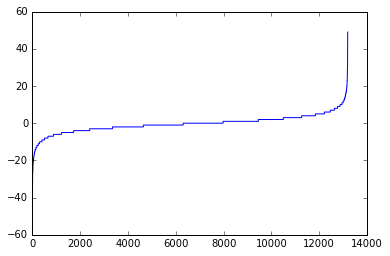

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
sls = [int(x*10000000.0)/100000 for x in sl]
plt.plot(sls)
print max(sls), min(sls), sum(sls)/len(sls), sum([x == 0 for x in sls]), len(sls)

In [83]:
import xml.etree.ElementTree as ET
import nltk
from sets import Set

ftogds = open("togds.txt", "r")

dgo = {}
dgs = {}

for line in ftogds:
    fields = line.split(',')
    dgo[fields[2]] = Set([])

ftogds.close()

ftogds = open("togds.txt", "r")
gnames = ['kohl','moody','st jude','accenture','adobe','aetna','agilent','akamai','allstate','altria','amazon','goldman sachs','apple','wal-mart',
    'chicago bridge & iron company','best buy','boeing','campbell','capital one','carnival','chubb','cisco','coach','comcast','conagra','dupont',
    'kodak','exxon','fifth third','ford motor','franklin templeton','garmin','goodyear','harman','hershey','honeywell','interpublic','taesa',
    'invesco funds','l-3 communications','laboratory corp of america','ford motor','loews','maestro','marriott','mastercard','merck','micron','yahoo',
    'morgan stanley','netflix','pnc bank','ralph lauren','priceline','prudential','red hat','royal caribbean','schlumberger','seagate','edison',
    'starbucks','target','walt disney','tiffany','transocean','union pacific','verizon','vornado','wells fargo','whole foods','wynn']

for line in ftogds:
    fields = line.split(',')
    oname = fields[1].encode('utf-8').strip().lower()
    guid = fields[2]
    lw = oname.split(' ')[-1]
    
    if lw[-1] == '\n':
        lw = lw[:-1]
    if lw == 'in' or lw[0:3]=='inc' or lw == 'co' or lw=='corp' or lw=='company' or lw == 'cos' or lw == 'corporation' or lw == '(co)' or lw=='ltd' or lw=='limited' or lw == '&':
        #cut from end to the last ' '
        oname = ' '.join(oname.split(' ')[:-1])

    if 'american telephone' in oname or 'at & t' in oname or 'at&t' in oname or 'at& t' in oname or 'at&amp;t' in oname or 'at &amp; t' in oname or 'at&amp; t' in oname:
        dgo[guid].add('at&t')
        dgo[guid].add('at& t')
        dgo[guid].add('at & t') 
        dgo[guid].add('at&amp; t')
        dgo[guid].add('at &amp; t')
        dgo[guid].add('at&amp;t')
        dgo[guid].add('a.t.')
    if 'coke' in oname:
        dgo[guid].add('coke')  
        dgo[guid].add('coca-cola') 
    if 'international business machines' in oname or 'ibm' in oname:
        dgo[guid].add('ibm')
        dgo[guid].add('i.b.m.')
    if 'american international group' in oname or 'aig' in oname:
        dgo[guid].add('aig')
    if 'h & r' in oname or 'h&r' in oname:
        dgo[guid].add('h&r')        
    if 'procter' in oname and 'gamble' in oname:
        dgo[guid].add('procter')
    if 'united parcel service' in oname:
        dgo[guid].add('ups')
    if 'university of southern california' in oname:
        dgo[guid].add('usc')
    if 'news corporation limited' in oname or 'newscorp' in oname or 'news corp' in oname:
        dgo[guid].add('newscorp')
        dgo[guid].add('news corp')
    
    for n in gnames:
        if n in oname:
            dgo[guid].add(n)
        
    dgo[guid].add(oname)
    sss = fields[4]
    if sss[-1]=='\n':
        sss = sss[:-1]
    dgs[guid]=str(int(float(sss)*1000000000.0)/12000000+37)
ftogds.close()
  

In [66]:
print dgo

{'1575981': Set(['apple', 'apple computer']), '1575982': Set(['apple', 'apple computer']), '1475833': Set(['wal-mart', 'wal-mart stores']), '1364973': Set(['micron technology', 'micron']), '0972479': Set(['waste management']), '1774045': Set(['microsoft']), '1570608': Set(['morgan stanley', 'morgan stanley dean witter &', 'united parcel service', 'union pacific', 'ups']), '1511221': Set(['marriott', 'marriott international']), '1616659': Set(['merck & company', 'merck']), '1432814': Set(['ebay']), '1273777': Set(['newscorp', 'news corporation', 'general electric', 'news corp']), '1146495': Set(['coca-cola']), '1273772': Set(['amazon', 'microsoft', 'amazon.com']), '1351060': Set(['newmont mining']), '1430913': Set(['news', 'general motors']), '1064956': Set(['i.b.m.', 'ibm', 'international business machines']), '0939417': Set(['nike']), '0896622': Set(['norfolk southern']), '1422263': Set(['i.b.m.', 'ibm', 'international business machines']), '1081053': Set(['ford motor']), '1175644': S

dddgo = dgo 
dddgs = dgs

In [84]:
import glob

sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
fall = open('all.txt', 'w')
fmiss = open('miss.txt','w')
#miss = Set([])
for fin in glob.glob('./nyt/*'):
    guid = fin[6:-4]

    '''
    this is the final step, well, almost, before the merge
    '''
    tree = ET.parse(fin)
    at_least_once = False
    for block in tree.getroot().iter('block'):
        if block.get('class') == 'full_text':
            for p in block.iter('p'):
                for sentence in sent_detector.tokenize(p.text.strip()):
                    found = False
                    for o in dgo[guid]:
                        if o.strip().lower() in sentence.strip().lower() and not found:
                            at_least_once = True
                            found = True
                            fall.write(dgs[guid]+'|'+sentence.encode('utf-8')+'\n')
    for abst in tree.getroot().iter('abstract'):
        #print guid
        for p in abst.iter('p'):
            if not p.text is None:
                for sentence in sent_detector.tokenize(p.text.strip()):
                    found = False
                    for o in dgo[guid]:
                        if o.strip().lower() in sentence.strip().lower() and not found:
                            at_least_once = True
                            found = True
                            fall.write(dgs[guid]+'|'+sentence.encode('utf-8')+'\n')
    for hl in tree.getroot().iter('hl1'):
        for sentence in sent_detector.tokenize(hl.text.strip()):
            found = False
            for o in dgo[guid]:
                if o.strip().lower() in sentence.strip().lower() and not found:
                    at_least_once = True
                    found = True
                    fall.write(dgs[guid]+'|'+sentence.encode('utf-8')+'\n')
        
    if not at_least_once:
        fmiss.write(guid+"|"+fin+"|"+str(dgo[guid])+'\n')
        #miss.add(dgo[guid])

fall.close()
fmiss.close()
#print miss

In [9]:
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
#sent_detector.tokenize(text.strip())
for line in open('tmp.txt'):
    print ;EMsent_detector.tokenize(line.strip())

['To shareholders of Tyco International, the industrial products conglomerate, are deals  usually no big deal?', 'The company, which makes ADT security systems and electronic components for hospitals, cars and computers, has made four purchases worth about $4 billion in the last four months alone and has long had an acquisitive streak.']


In [36]:
miss = Set([])
for name in open('missed.txt'):
    miss.add(name)
lmiss = list(miss)
lmiss.sort()
print len(lmiss)

for item in lmiss:
    print item[:-1]

198
"kohl's department stores"
"moody's investors service"
"st jude children's research hospital (memphis)"
'3 doors down (music group)'
'abyssinian baptist church (nyc)'
'accenture (co)'
'accenture (co)', 'accenture limited'
'accenture limited'
'adobe systems'
'aetna life insurance'
'aetna us healthcare'
'aetna'
'agilent technologies'
'akamai technologies'
'alain ducasse at the essex house (nyc)'
'allstate insurance'
'altria group'
'amazon.com'
'american airlines'
'american express'
'american international group', 'goldman sachs group'
'american telephone & telegraph co inc (at&t)'
'american telephone & telegraph co inc (at&t)', 'at&t bell laboratories'
'aon group'
'apple computer'
'apple computer', 'adobe systems'
'apple computer', 'best buy company'
'apple computer', 'international business machines'
'apple computer', 'microsoft'
'apple'
'archer-daniels-midland'
'at&t bell laboratories'
'at&t microelectronics'
'at&t'
'becton dickinson &'
'bed bath & beyond', 'wal-mart stores'
'best 